In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

## Loading and cleaning data

In [138]:
from os import getcwd

data_path = getcwd() + "/data/Auto.csv"
df = pd.read_csv(data_path)

In [139]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
#  3   horsepower    397 non-null    object 
# the horspower column is not numerical

In [6]:
np.sort(df.horsepower.unique())

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [7]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [8]:
# remove entries with the unknown horsepower value '?' 
df = df[df['horsepower']!= '?']
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
# df['horsepower'] = df['horsepower'].astype('int')# both work
df.reset_index(inplace=True, drop=True)

### ISLR exercises

#### 8

(a) Perform linear regression on auto data with mpg as response and horsepower as the predictor and display the summary results.

In [9]:
# using statsmodels

X = df['horsepower']
y = df['mpg']

# sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().
# If you don't do sm.add_constant or when LinearRegression(fit_intercept=False),
# then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b,
# and it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data.
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        18:00:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# using sklearn
ln = LinearRegression()

In [11]:
# doesn't work with Series (!), works with DF's and numpy arrays
ln.fit(df[['horsepower']], df[['mpg']])

# alternatives with arrays  & reshape
# ln.fit(df['horsepower'].values.reshape(-1,1), df['mpg'].values.reshape(-1,1))
# ln.fit(np.array(df.horsepower).reshape(-1,1), np.array(df.mpg).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
ln.coef_

array([[-0.15784473]])

In [13]:
ln.intercept_

array([39.93586102])

In [14]:
# R^2
ln.score(df[['horsepower']], df[['mpg']])

0.6059482578894348

In [15]:
predictions = ln.intercept_ + ln.coef_*df['horsepower'].values
residuals = df['mpg'].values - predictions

# Residual Sum of Squares
RSS = np.sum(residuals**2)

# Residual Standard Error
degrees_of_freedom  = len(df['mpg'].values)-2
RSE = np.sqrt(RSS/degrees_of_freedom)
RSE

4.90575691954594

In [16]:
RSE/df['mpg'].mean()

0.20923714066914834

In [17]:
print("95% CI: " +str(results.conf_int(alpha=0.05)))

95% CI:                     0          1
const       38.525212  41.346510
horsepower  -0.170517  -0.145172


i. Is there a relationship between the predictor and the response?

yes, as the p-value corresponding to the F-statistic is very low, indicating there's a relationship between mpg and horsepower

ii. How strong is the relationship between the predictor and the response?

R2 = 0.606, so we can say that ~60% of variability is explaied by the model.

Based on the RSE value, we can say that the real mpg values deviate from the true regression line by ~ 4.9 units (~ 21%), on average. 

iii. Is the relationship between the predictor and the response positive or negative?

Negative coefficient -> negative relationship

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [18]:
ln.predict(np.array(98).reshape(-1,1))

array([[24.46707715]])

In [19]:
results.predict([1, 98])

array([24.46707715])

In [20]:
predictions = results.get_prediction([1, 98])
predictions.summary_frame(alpha=0.05)
# 'obs'for prediction intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [21]:
df[df['horsepower']>200]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
66,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
93,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
94,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
115,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix


In [22]:
# how to get all intervals:

In [23]:
from statsmodels.stats.outliers_influence import summary_table

In [24]:
simpleTable, data, column_names = summary_table(
    results, alpha=0.05)

In [25]:
data = pd.read_html(simpleTable.as_html(), index_col=0)[0]
data.head()

Obs    Dep Var  Predicted    Std Error    Mean ci            Predict ci  \
    Population      Value Mean Predict    95% low    95% upp    95% low   
1.0       18.0  19.416046     0.297444  18.831250  20.000841   9.753295   
2.0       15.0  13.891480     0.462181  12.982802  14.800158   4.203732   
3.0       18.0  16.259151     0.384080  15.504025  17.014277   6.584598   
4.0       16.0  16.259151     0.384080  15.504025  17.014277   6.584598   
5.0       17.0  17.837598     0.337403  17.174242  18.500955   8.169775   

Obs                      Residual Std Error   Student    Cook's  
       95% upp Unnamed: 8_level_1  Residual  Residual         D  
1.0  29.078797          -1.416046  4.896731 -0.289182  0.000154  
2.0  23.579228           1.108520  4.883937  0.226973  0.000231  
3.0  25.933704           1.740849  4.890699  0.355951  0.000391  
4.0  25.933704          -0.259151  4.890699 -0.052989  0.000009  
5.0  27.505422          -0.837598  4.894140 -0.171143  0.000070

In [26]:
# fix the column names
data.columns = [i.replace('\n', ' ') for i in column_names][1:]

data.reset_index(inplace=True, drop=True)
data.head()

,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,18.0,19.416046,0.297444,18.831250,20.000841,9.753295,29.078797,-1.416046,4.896731,-0.289182,0.000154
1,15.0,13.891480,0.462181,12.982802,14.800158,4.203732,23.579228,1.108520,4.883937,0.226973,0.000231
2,18.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704,1.740849,4.890699,0.355951,0.000391
3,16.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704,-0.259151,4.890699,-0.052989,0.000009
4,17.0,17.837598,0.337403,17.174242,18.500955,8.169775,27.505422,-0.837598,4.894140,-0.171143,0.000070


In [27]:
############

(b) Plot the response and the predictor. Also show the regression line.

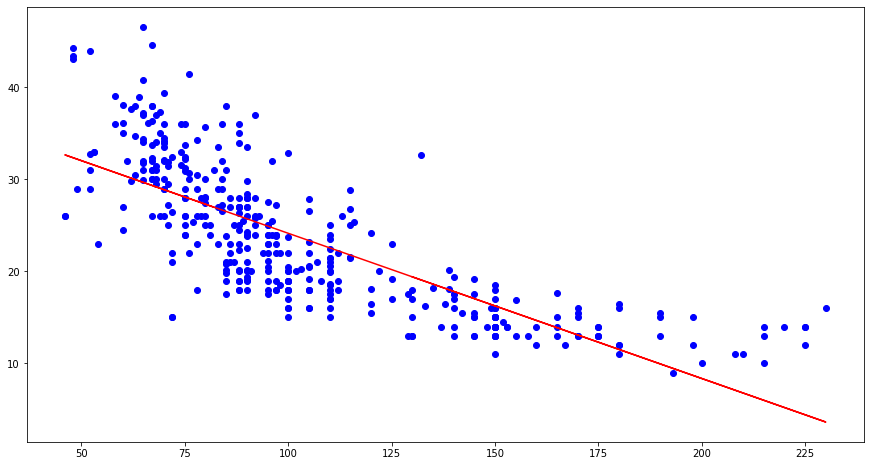

In [28]:
# predictions = 39.9359 + (-0.1578)*df['horsepower'].values
predictions = results.fittedvalues # more accurate (no roundings)

fig = plt.figure(figsize=(15,8))

plt.scatter(df.horsepower, df.mpg, color='blue')
plt.plot(df.horsepower, predictions, color='red')

c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [29]:
# Residual plots

Text(0.5, 1.0, 'Residual plot')

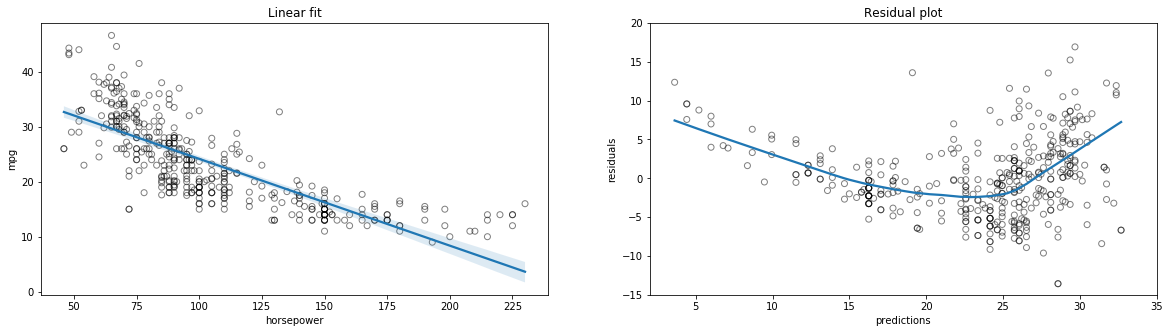

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

sns.regplot('horsepower', 'mpg', data=df, ax=ax1,
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.set_title('Linear fit')

sns.regplot(predictions, residuals, ax=ax2, lowess=True,
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.set_xlim(2,35)
ax2.set_ylim(-15,20)
ax2.set_xlabel('predictions')
ax2.set_ylabel('residuals')
ax2.set_title('Residual plot')

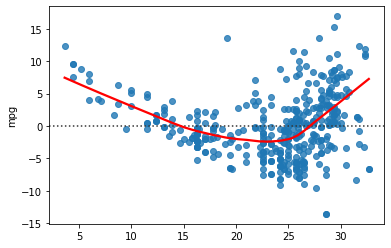

In [31]:
# seaborn built-in for residual plots
sns.residplot(predictions, 'mpg', data=df, lowess=True, line_kws={'color': 'red'})

response-predictor chart with the regression line
- a slight U pattern in data indicates a non-linear relationship,
- no extreme outliers.

residual plot:
- a slight U pattern in data and the linear fit indicate a non-linear relationship,
- shows the funnel shape of data - heteroscedasticity (non-constatnt variance of error terms,
- no extreme outliers,

(internally studentized) residual plot:
- Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. There are 2 such cases but do not look extreme.

internally studentized residuals vs leverage plot:
- no high leverage points (low cook's distance values)

Q-Q plot:
- the data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed.



In [32]:
# residuals and studentized residuals plots

In [33]:
# studentized_residuals = data.loc[:,'Student Residual']
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

Text(0, 0.5, 'inter_studentized_resid')

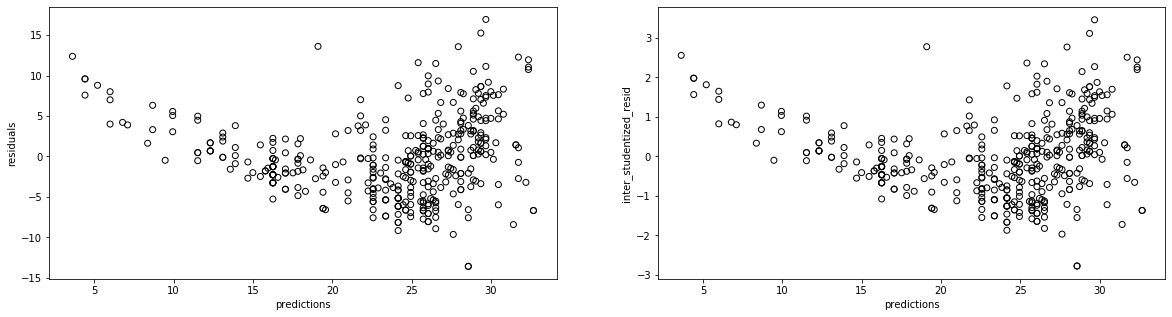

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.scatter(predictions, residuals, facecolors='none', edgecolors='k')
ax1.set_xlabel('predictions')
ax1.set_ylabel('residuals')

ax2.scatter(predictions, inter_studentized_resid, facecolors='none', edgecolors='k')
ax2.set_xlabel('predictions')
ax2.set_ylabel('inter_studentized_resid')

In [35]:
inter_studentized_resid[inter_studentized_resid>3]

array([3.45890854, 3.11425618])

In [36]:
len(inter_studentized_resid[inter_studentized_resid<=3])

390

In [37]:
# Leverage and Studentized Residuals plot

Studentized residuals are udoubtedly better in detecting outliers, and, maybe, a little bit better in heteroscedasticity inspection.

Standardized: this is actually the raw residuals divided by the true standard deviation of the residuals. As the true standard deviation is rarely known, a standardized residual is almost never used.

Internally Studentized: because the true standard deviation of the residuals is not typically known, the estimated standard deviation is used instead. This is an interanlly studentized residual, and it is sometimes called standardized.

Externally Studentized: the same as the internally studentized residual, except that the estimate of the standard deviation of the residuals is calcuated from a regression leaving out the observation in question.



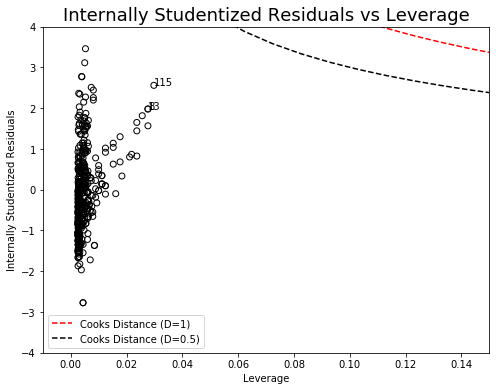

In [38]:
from statsmodels.stats.outliers_influence import OLSInfluence

leverage = pd.Series(results.get_influence().hat_matrix_diag) # a series as indices required for the annotations below
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, inter_studentized_resid,facecolors='none', edgecolors='k')
plt.title('Internally Studentized Residuals vs Leverage', fontsize=18)
ax.set_xlabel('Leverage')
ax.set_ylabel('Internally Studentized Residuals')
plt.ylim(-4, 4) # set manually
plt.xlim(-0.01, 0.15) # set manually


# annotations
model_cooks = results.get_influence().cooks_distance[0] # returns a tuple with cook's distances and p-values
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, xy=(leverage[i], inter_studentized_resid[i]))


# adding cook's distance contours
def one_line(x):
    return np.sqrt((1 * len(results.params) * (1 - x)) / x)

def point_five_line(x):
    return np.sqrt((0.5 * len(results.params) * (1 - x)) / x)
     
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    

show_cooks_distance_lines(one_line,
                        np.linspace(0.001, 0.500, 50),
                          'red',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(0.001, 0.500, 50),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.legend(loc='best')

In [39]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [40]:
len(model_cooks)

392

In [41]:
4/392

0.01020408163265306

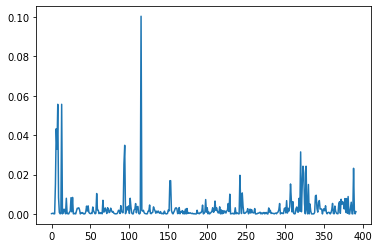

In [42]:
plt.plot(data['Cook\'s D'])

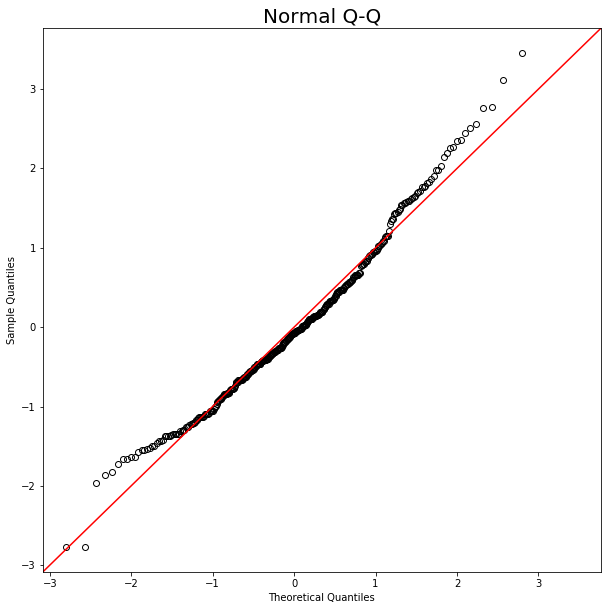

In [43]:
plt.rc('figure', figsize=(10,10))
# plt.style.use('ggplot')

probplot = sm.ProbPlot(results.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

#### 9

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

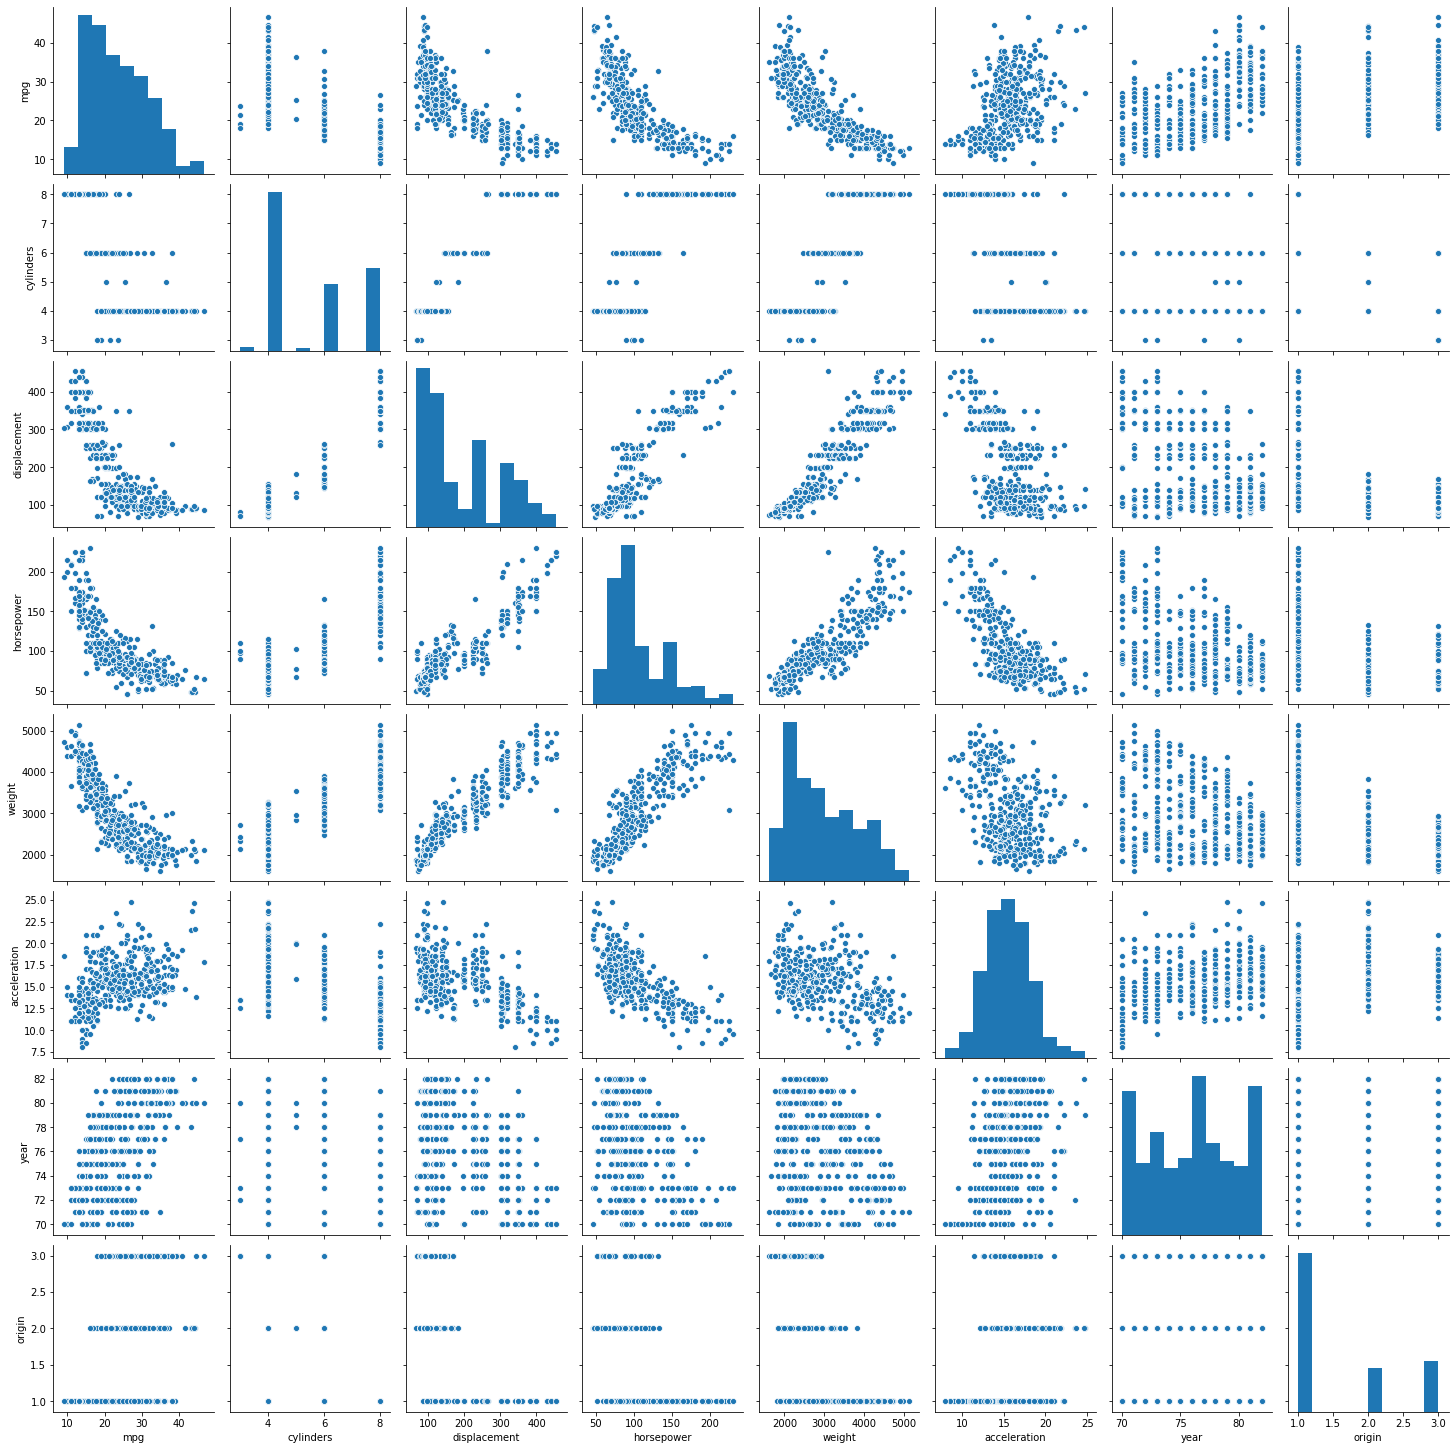

In [44]:
sns.pairplot(df)

(b) Compute the matrix of correlations between the variables.


In [45]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


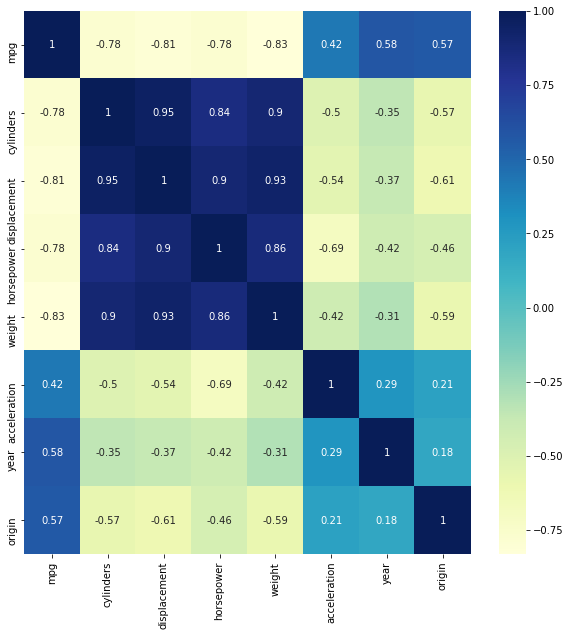

In [46]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [47]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
y = df['mpg']

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          2.04e-139
Time:                        18:01:04   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response?

Yes, there is a relatioship between the predictors and the response by testing the null hypothesis of whether all the regression coefficients are zero. The F -statistic is far from 1 (with a small p-value), indicating evidence against the null hypothesis.

ii. Which predictors appear to have a statistically significant relationship to the response?

Looking at the p-values associated with each predictor’s t-statistic,the predictors that have statistically significant relationship to the response are: displacement, weight, year and origin.

iii. What does the coefficient for the year variable suggest?

The coefficient of year varaible suggests that if all the other predictors are kept constant, increase of 1 in year results in 0.7508 increase in mpg (the newer a car is, less fuel is needed to drive the same distance).

(d) produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

In [48]:
# Residual plots

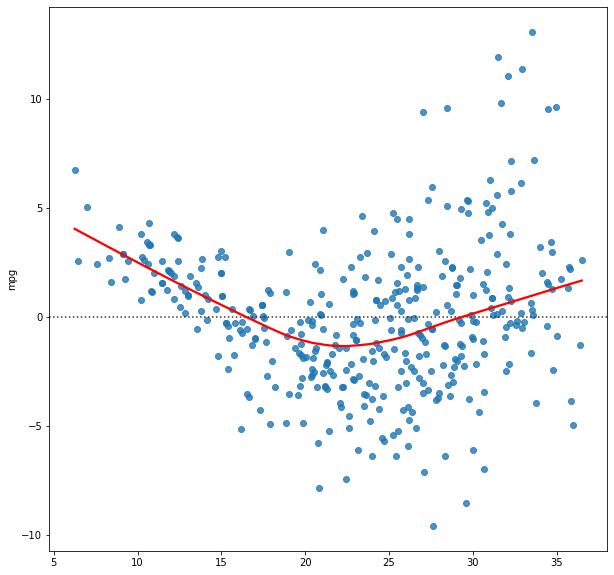

In [49]:
# seaborn built-in for residual plots
sns.residplot(results.fittedvalues, 'mpg', data=df, lowess=True, line_kws={'color': 'red'})

REWRITE

residual plot:
- an U pattern in data indicates a non-linear relationship,
- shows the funnel shape of data - heteroscedasticity (non-constatnt variance of error terms,
- no extreme outliers,

(internally studentized) residual plot:
- Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. There are a few cases like that (2.84982284, 2.92396761, 2.9283754, 2.93864625, 2.96274154, 3.34468063, 3.44488536, 3.6310711 , 3.9518941)

internally studentized residuals vs leverage plot:
- one point (13) has a relatively high leverage

Q-Q plot:
- the data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed. ## DOUBLECHECK


In [50]:
# residuals and studentized residuals plots

In [51]:
# studentized_residuals = data.loc[:,'Student Residual']
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

Text(0, 0.5, 'inter_studentized_resid')

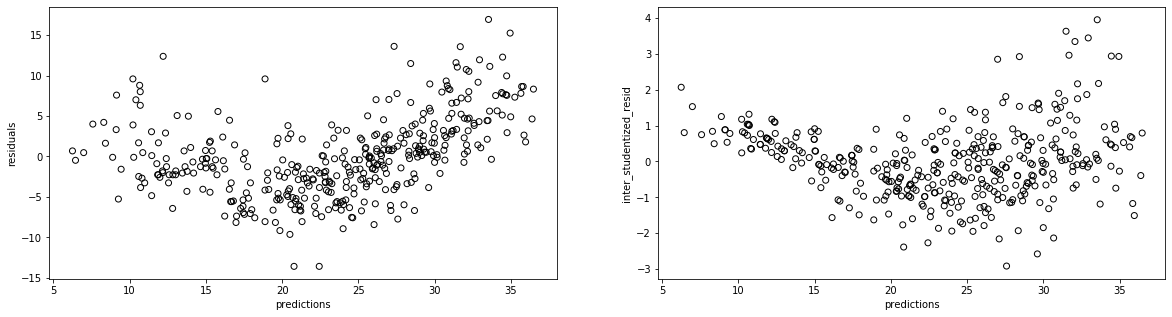

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.scatter(results.fittedvalues, residuals, facecolors='none', edgecolors='k')
ax1.set_xlabel('predictions')
ax1.set_ylabel('residuals')

ax2.scatter(results.fittedvalues, inter_studentized_resid, facecolors='none', edgecolors='k')
ax2.set_xlabel('predictions')
ax2.set_ylabel('inter_studentized_resid')

In [53]:
np.sort(inter_studentized_resid[inter_studentized_resid>2.5])

array([2.84982284, 2.92396761, 2.9283754 , 2.93864625, 2.96274154,
       3.34468063, 3.44488536, 3.6310711 , 3.9518941 ])

In [54]:
len(inter_studentized_resid[inter_studentized_resid<=2.5])

383

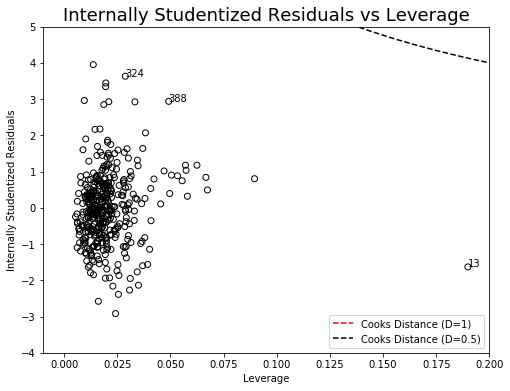

In [55]:
leverage = pd.Series(results.get_influence().hat_matrix_diag) # a series as indices required for the annotations below
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, inter_studentized_resid,facecolors='none', edgecolors='k')
plt.title('Internally Studentized Residuals vs Leverage', fontsize=18)
ax.set_xlabel('Leverage')
ax.set_ylabel('Internally Studentized Residuals')
plt.ylim(-4, 5) # set manually
plt.xlim(-0.01, 0.20) # set manually


# annotations
model_cooks = results.get_influence().cooks_distance[0] # returns a tuple with cook's distances and p-values
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, xy=(leverage[i], inter_studentized_resid[i]))


# adding cook's distance contours
def one_line(x):
    return np.sqrt((1 * len(results.params) * (1 - x)) / x)

def point_five_line(x):
    return np.sqrt((0.5 * len(results.params) * (1 - x)) / x)
     
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    

show_cooks_distance_lines(one_line,
                        np.linspace(0.001, 0.500, 50),
                          'red',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(0.001, 0.500, 50),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.legend(loc='lower right')

In [56]:
model_cooks[13]

0.07780083513972955

In [57]:
results.params

const          -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

In [58]:
len(model_cooks)

392

In [59]:
4/392

0.01020408163265306

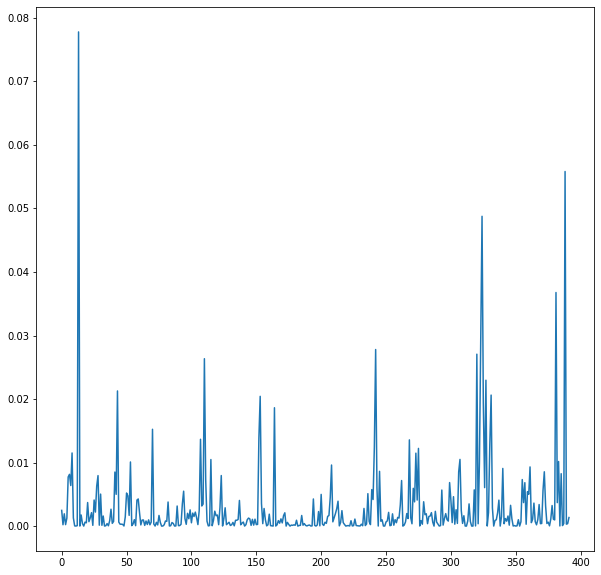

In [60]:
plt.plot(model_cooks)

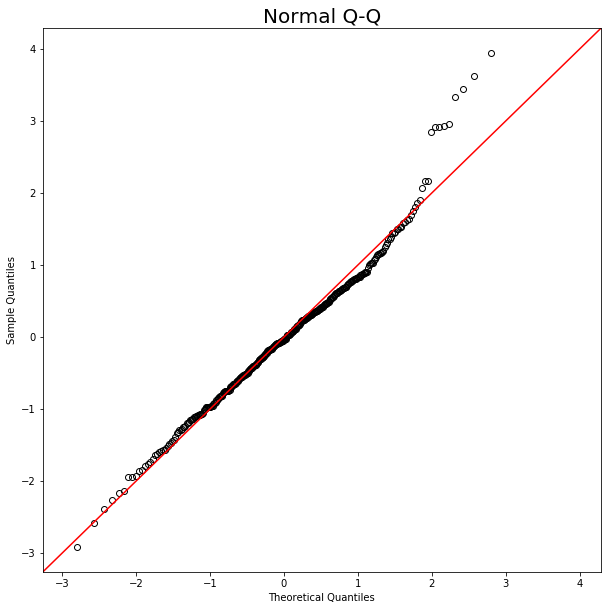

In [61]:
plt.rc('figure', figsize=(10,10))
# plt.style.use('ggplot')

probplot = sm.ProbPlot(results.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,763.557531,const
1,10.737535,cylinders
2,21.836792,displacement
3,9.943693,horsepower
4,10.831260,weight
5,2.625806,acceleration
6,1.244952,year
7,1.772386,origin


As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity

(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

TypeError: 'Index' object is not callable

In [78]:
# Getting all interaction effects

from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True) # "interaction_only=False", it returns also the squared values of predictors
X_inter = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names(input_features=X.columns))

X_inter.head()

#  from: 

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,const cylinders,const displacement,...,horsepower weight,horsepower acceleration,horsepower year,horsepower origin,weight acceleration,weight year,weight origin,acceleration year,acceleration origin,year origin
0,1.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,8.0,307.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,1.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,8.0,350.0,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,1.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,8.0,318.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,1.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,8.0,304.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,1.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,8.0,302.0,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0


In [85]:
X_inter.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'const cylinders',
       'const displacement', 'const horsepower', 'const weight',
       'const acceleration', 'const year', 'const origin',
       'cylinders displacement', 'cylinders horsepower', 'cylinders weight',
       'cylinders acceleration', 'cylinders year', 'cylinders origin',
       'displacement horsepower', 'displacement weight',
       'displacement acceleration', 'displacement year', 'displacement origin',
       'horsepower weight', 'horsepower acceleration', 'horsepower year',
       'horsepower origin', 'weight acceleration', 'weight year',
       'weight origin', 'acceleration year', 'acceleration origin',
       'year origin'],
      dtype='object')

In [90]:
# Not as straightforward as it looked initially (increased chance of false positive findings, etc.):
# https://bookdown.org/max/FES/complete-enumeration.html

# A simple interaction example instead (for time being) 

In [89]:
X_with_inter = pd.concat([X, X_inter.loc[:,'displacement horsepower']], axis=1)
X_with_inter.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement horsepower
0,1.0,8,307.0,130,3504,12.0,70,1,39910.0
1,1.0,8,350.0,165,3693,11.5,70,1,57750.0
2,1.0,8,318.0,150,3436,11.0,70,1,47700.0
3,1.0,8,304.0,150,3433,12.0,70,1,45600.0
4,1.0,8,302.0,140,3449,10.5,70,1,42280.0


In [88]:
model_with_inter = sm.OLS(y, X_with_inter)
results_with_inter = model_with_inter.fit()

results_with_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.1
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          1.59e-160
Time:                        10:23:18   Log-Likelihood:                -970.71
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1995.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8935      4.302     -0.440      0.660     -10.352       6.565
cylinders                   0.6466      0.302      2.143      0.033       0.053       1.240
displacement               -0.0749      0.011     -6.859      0.000      -0.096      -0.053
horsepower                 -0.1975      0.021     -9.624      0.000      -0.238      -0.157
weight                     -0.0031      0.001     -4.861      0.000      -0.004      -0.002
acceleration               -0.2131      0.091     -2.351      0.019      -0.391      -0.035
year                        0.7379      0.045     16.534      0.000       0.650       0.826
origin                      0.6891      0.253      2.727      0.007       0.192       1.186
displacement horsepower     0.0005   4.81e-05     10.878      0.000       0.000       0.001
==============================================================================
Omnibus:                       45.547   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.147
Skew:                           0.650   Prob(JB):                     1.61e-20
Kurtosis:                       4.972   Cond. No.                     9.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interaction effect between displacement and horsepower is statistically significant.

Increased model accuracy (the R-squared statistic improved from 0.818 to 0.864)

(f) Try a few different transformations of the variables, such as
log(X), X, X 2 . Comment on your findings.

In [104]:
# using "OLS.from_formula" (alternatively, add new columns with transformations and refer to them)
# https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html

model_with_transf = sm.OLS.from_formula(formula='mpg ~ cylinders + (displacement**2)', data=df)
results_with_transf = model_with_transf.fit()

results_with_transf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           2.41e-89
Time:                        11:26:37   Log-Likelihood:                -1155.6
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     389   BIC:                             2329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.5377      1.197     30.534      0.000      34.185      38.890
cylinders       -0.5763      0.443     -1.300      0.194      -1.448       0.295
displacement    -0.0511      0.007     -7.074      0.000      -0.065      -0.037
==============================================================================
Omnibus:                       41.461   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.956
Skew:                           0.700   Prob(JB):                     2.13e-14
Kurtosis:                       4.377   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

10

In [140]:
data_path = getcwd() + "/data/Carseats.csv"
carseats_df = pd.read_csv(data_path)

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
